Humanitarian Data Exchange Data set about Philippines (2019)

In [122]:
import pandas as pd #Importing the matplotlib library and renaming it as plt.

import matplotlib.pyplot as plt #Importing pandas library

data=pd.read_excel(r'200204_philippines-2019-events-data.xlsx_3FAWSAccessKeyId=AKIAXYC32WNARK756OUG_Expires=1644193427_Signature=hFTPcWroN6S3M2pX40ObWvu24p8=.xlsx', sheet_name="Tropical Cyclones")

df=pd.DataFrame(data) #convert dataset excel into dataframe

#selecting all needed and specific columns from original dataframe/dataset and creating new dataframe named new_df
new_df = df.iloc[:,[0,2,4,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23]].copy()

In [25]:
new_df.info() # info() function was used to get an understanding of which aspects of the dataset need cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Region                    686 non-null    object        
 1   Province                  686 non-null    object        
 2   City_Mun                  686 non-null    object        
 3   Year                      687 non-null    int64         
 4   Incident                  687 non-null    object        
 5   Date Occurred             687 non-null    datetime64[ns]
 6   2015 Population           687 non-null    int64         
 7   Affected_FAM              687 non-null    int64         
 8   Affected_PERs             686 non-null    float64       
 9   Inside_EC_Fam_Cum         659 non-null    float64       
 10  Inside_EC_Fam_Now         687 non-null    int64         
 11  Inside_EC_Per_Cum         659 non-null    float64       
 12  Inside_EC_Per_Now     

In [84]:
new_df.isnull().sum() #checking for total null values. The resulted values or rows that had null values will be subjected to cleaning.

Region                       1
Province                     1
City_Mun                     1
Year                         0
Incident                     0
Date Occurred                0
2015 Population              0
Affected_FAM                 0
Affected_PERs                1
Inside_EC_Fam_Cum           28
Inside_EC_Fam_Now            0
Inside_EC_Per_Cum           28
Inside_EC_Per_Now            1
Outside_EC_Fam_Cum          28
Outside_EC_Fam_Now          28
Outside_EC_Pers_Cum         28
Outside_EC_Per_Now           0
Totally damaged houses       0
Partially damaged houses     1
IDP_Cum                      0
dtype: int64

In [118]:
#To clean the dataframe and remove the object data string columns (Region, Province, City Mun) which had three null values, dropna() function was used.

new_df = new_df.dropna(subset=['Region', 'Province', 'City_Mun'])

In [102]:
# After dropping all null values of object string data types, isnull() function were again used to check if the null row(s) was dropped. As the table display below, all object string null rows were removed. However, there are still null values for the int data types columns on the dataframe. This null values are also subjected for cleaning.
new_df.isnull().sum() #checking for total null values

Region                       1
Province                     1
City_Mun                     1
Year                         0
Incident                     0
Date Occurred                0
2015 Population              0
Affected_FAM                 0
Affected_PERs                1
Inside_EC_Fam_Cum           28
Inside_EC_Fam_Now            0
Inside_EC_Per_Cum           28
Inside_EC_Per_Now            1
Outside_EC_Fam_Cum          28
Outside_EC_Fam_Now          28
Outside_EC_Pers_Cum         28
Outside_EC_Per_Now           0
Totally damaged houses       0
Partially damaged houses     1
IDP_Cum                      0
dtype: int64

In [92]:
# From the results above, there are a number of int data type null values that need to be cleaned. And pandas can only clean the dataframe if all rows has values specially for integers. All object data types are already have no null values, which they are all strings. Thus, fillna() function was used to replace null values to zero for smooth data analysis.
new_df = new_df.fillna(0) # replace NaN with zero value

In [123]:
new_df.isnull().sum() #checking for total null values

#After all of these data cleaning processes, the final dataframe for analysis were created and named  as "new_df". And from the results below of isnull() function from the new dataframe, there are now no null values from within the data frame. Thus, data analysis would be smooth and no errors can occur on the latter part of this EDA.

Region                       1
Province                     1
City_Mun                     1
Year                         0
Incident                     0
Date Occurred                0
2015 Population              0
Affected_FAM                 0
Affected_PERs                1
Inside_EC_Fam_Cum           28
Inside_EC_Fam_Now            0
Inside_EC_Per_Cum           28
Inside_EC_Per_Now            1
Outside_EC_Fam_Cum          28
Outside_EC_Fam_Now          28
Outside_EC_Pers_Cum         28
Outside_EC_Per_Now           0
Totally damaged houses       0
Partially damaged houses     1
IDP_Cum                      0
dtype: int64

    1. Determine the top 5 typhoons from 2019 that brought the greatest number of infrastructure casualties to the Provinces in the Philippines based from Totally Damaged Houses x variable. 

In [124]:
cyclone=df.groupby("Incident")
dhouse=cyclone["Totally damaged houses"].sum()
typ=pd.DataFrame(dhouse)

cycph=typ.sort_values(by="Totally damaged houses", ascending=False)
tdh=cycph.head(5)
display(tdh)

,Totally damaged houses
Incident,
TY Tisoy,68104
TY Ursula,60483
TS Quiel,59
TS Hanna,56
TD Marilyn,44


2. Acquire the data about the Provinces who had the greatest number of affected individuals per typhoon (Affected_Pers). 

,Affected_PERs
Province,
LEYTE,772162.0
CAPIZ,622951.0
Northern Samar,602234.0
AKLAN,504447.0
SAMAR (WESTERN SAMAR),483308.0


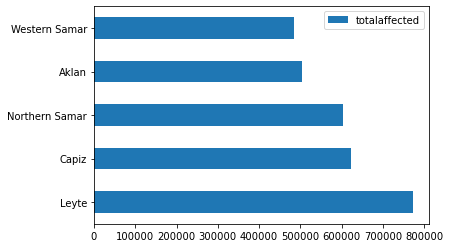

In [125]:
#top 5 typhoons from 2019 that brought the greatest number of infrastructure casualties to the Provinces in the Philippines 
ByProvince= df.groupby('Province')
TotalData = ByProvince['Affected_PERs'].sum()
data= pd.DataFrame(TotalData)
SortedData= data.sort_values(by='Affected_PERs',ascending=False)
result= SortedData.head(5)
display(result)

#data graphing 
totalaffected = [772162, 622951, 602234, 504447, 483308]
index = ['Leyte', 'Capiz', 'Northern Samar',
         'Aklan', 'Western Samar']
df = pd.DataFrame({'totalaffected': totalaffected,
                   'province': province}, index=index)
ax = df.plot.barh(y='totalaffected')

3. Get the information that shows the top 5 municipalities who were most affected by typhoons from the year 2019.  

In [6]:
ByMuni= df.groupby('City_Mun')
TotalData=ByMuni['Affected_PERs'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Affected_PERs',ascending=False)
result= SortedData.head(5)
display(result)

,Affected_PERs
City_Mun,
CITY OF ROXAS (CAPITAL),168580.0
Daraga (Locsin),126595.0
CITY OF CATBALOGAN (CAPITAL),122572.0
CITY OF TACLOBAN (CAPITAL),119918.0
Catarman (capital),106424.0
